In [1]:
import numpy as np
import scanpy as sc
import pandas as pd 

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.set_figure_params(dpi=200, frameon=False)

In [3]:
adata = sc.read("/home/mohsen/data/hcl/latents/species_age/hcl+mca.h5ad")

In [4]:
meta_data = pd.read_csv("../../data/species.csv")

In [5]:
meta_data

,Cell,Species,Celltype,Cluster,subCluster
0,Human20,HCL,Endothelial cell,Endothelial,Endothelial
1,Human29,HCL,Endothelial cell,Endothelial,Endothelial
2,Human61,HCL,Sinusoidal endothelial cell,Endothelial,Endothelial
3,Human66,HCL,Endothelial cell(endothelial to mesenchymal tr...,Endothelial,Endothelial
4,Human8,HCL,Endothelial cell(APC),Endothelial,Endothelial
...,...,...,...,...,...
201,Mouse58,MCA,Stromal cell,Stromal,Stromal
202,Mouse63,MCA,Stromal cell,Stromal,Stromal
203,Mouse66,MCA,Stromal cell,Stromal,Stromal
204,Mouse74,MCA,Stromal cell,Stromal,Stromal


In [6]:
adata

AnnData object with n_obs × n_vars = 282944 × 20 
    obs: 'age', 'batch', 'cellnames', 'celltype', 'cluster', 'donor', 'n_counts', 'refined_tissue', 'sample', 'species', 'species_age', 'species_stage', 'stage', 'tissue'
    uns: 'neighbors', 'species_age_colors', 'tissue_colors', 'umap'
    obsm: 'X_umap'

In [7]:
adata.uns['species_colors'] = sc.pl.palettes.godsnot_102[6:8]

In [8]:
adata

AnnData object with n_obs × n_vars = 282944 × 20 
    obs: 'age', 'batch', 'cellnames', 'celltype', 'cluster', 'donor', 'n_counts', 'refined_tissue', 'sample', 'species', 'species_age', 'species_stage', 'stage', 'tissue'
    uns: 'neighbors', 'species_age_colors', 'tissue_colors', 'umap', 'species_colors'
    obsm: 'X_umap'

In [9]:
sub_cluster = meta_data["Cluster"].unique()

In [10]:
meta_data["Celltype"].replace("AT2 cell", "Alveolar type II cell", inplace=True)
meta_data["Celltype"].replace("Fetal neuron", "Fetal Neuron", inplace=True)
meta_data["Celltype"].replace("Intercalated cell", "Intercalated cells of collecting duct", inplace=True)

In [11]:
clust_ct_map = {}
for i in sub_cluster:
    clust_ct_map[i] = meta_data[meta_data["Cluster"] == i]["Celltype"].unique()

In [12]:
adata.obs["species"].value_counts()

Human    160000
Mice     122944
Name: species, dtype: int64

#### Immune cell type

In [13]:
adata.obs["celltype"].replace("AT2 cell", "Alveolar type II cell", inplace=True)
adata.obs["celltype"].replace("Fetal neuron", "Fetal Neuron", inplace=True)
adata.obs["celltype"].replace("Intercalated cell", "Intercalated cells of collecting duct", inplace=True)

In [14]:
adata.uns['celltype_colors'] = sc.pl.palettes.godsnot_102[:len(adata.obs['celltype'].unique())]

In [15]:
cells_to_check = ["Endothelial", "Epithelial", "Erythroid", "Immune", "Muscle","Neuron","Secretory","Stromal"]

In [16]:
cells_to_check = ["Epithelial",]

Epithelial
View of AnnData object with n_obs × n_vars = 43378 × 20 
    obs: 'age', 'batch', 'cellnames', 'celltype', 'cluster', 'donor', 'n_counts', 'refined_tissue', 'sample', 'species', 'species_age', 'species_stage', 'stage', 'tissue'
    uns: 'neighbors', 'species_age_colors', 'tissue_colors', 'umap', 'species_colors', 'celltype_colors'
    obsm: 'X_umap'


/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/envs/mohsen/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/envs/m

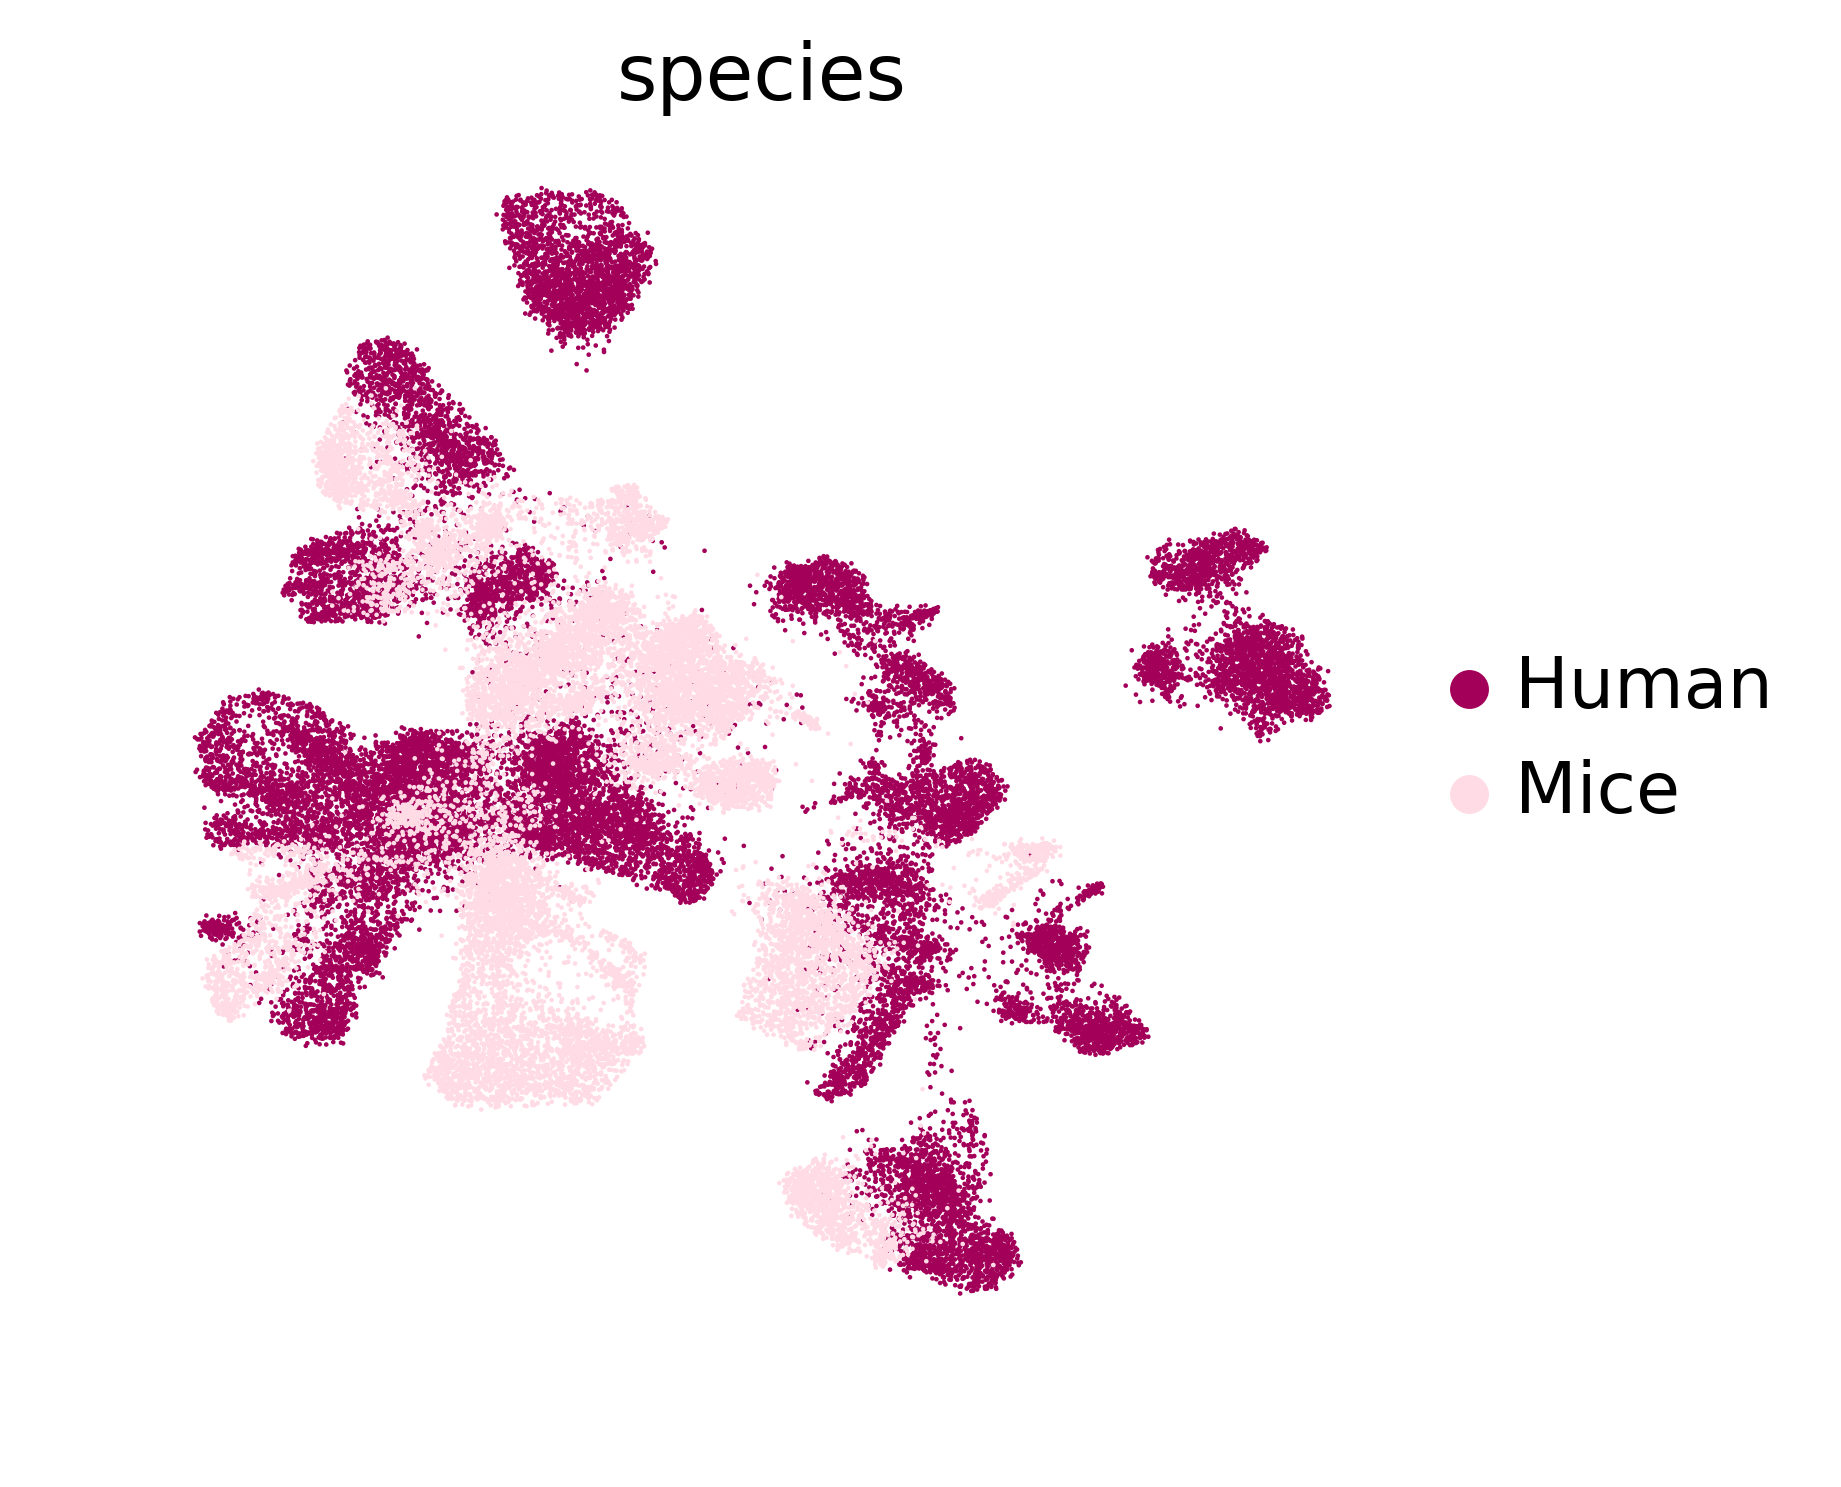

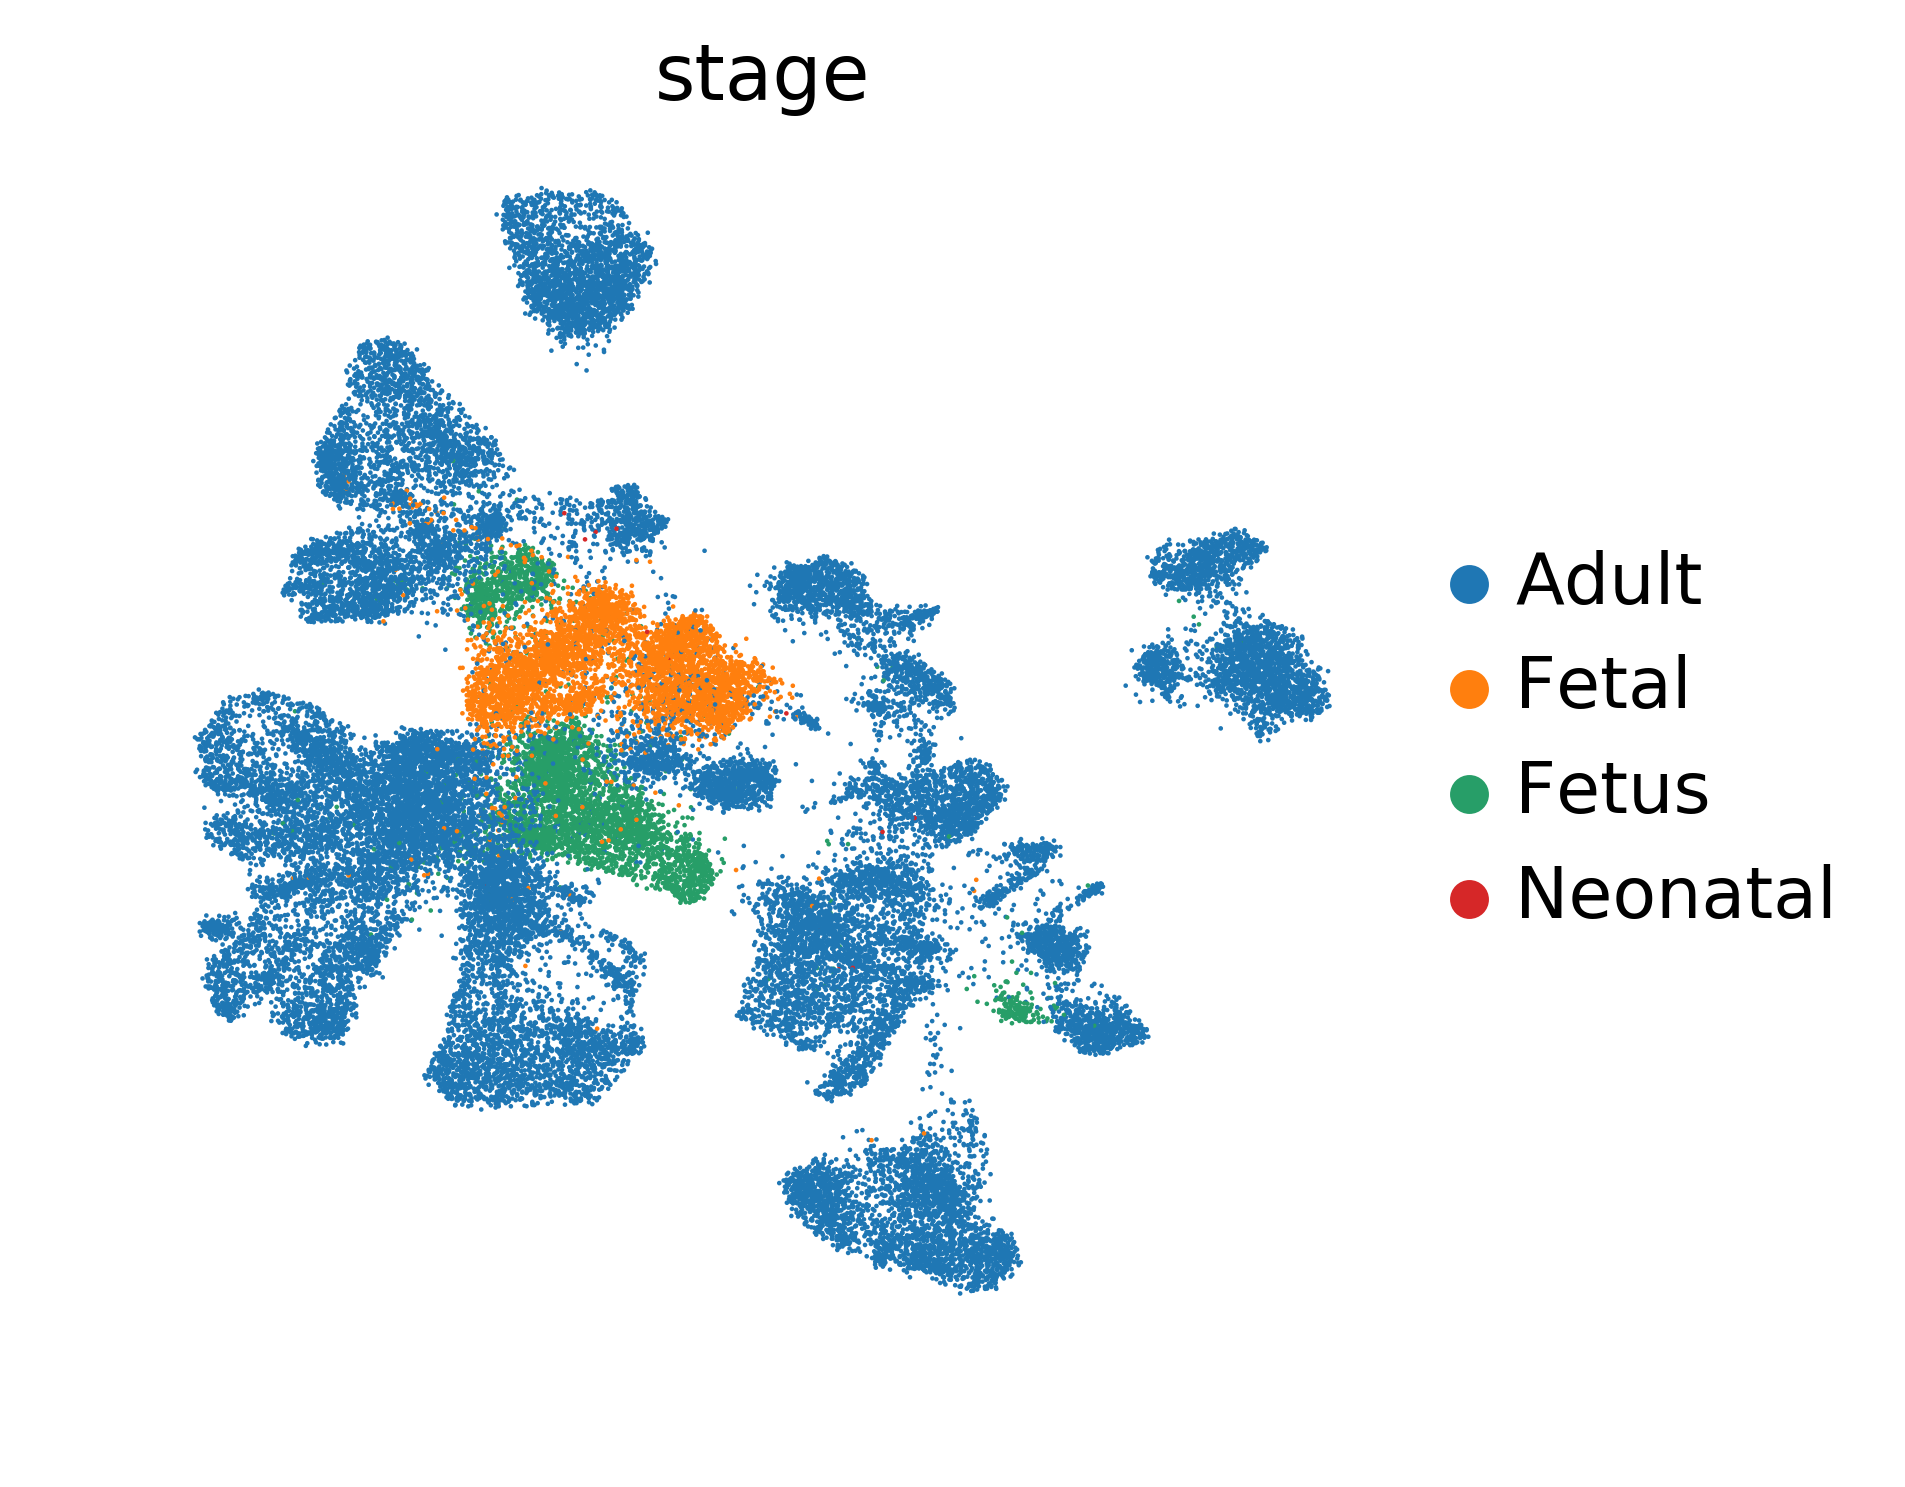

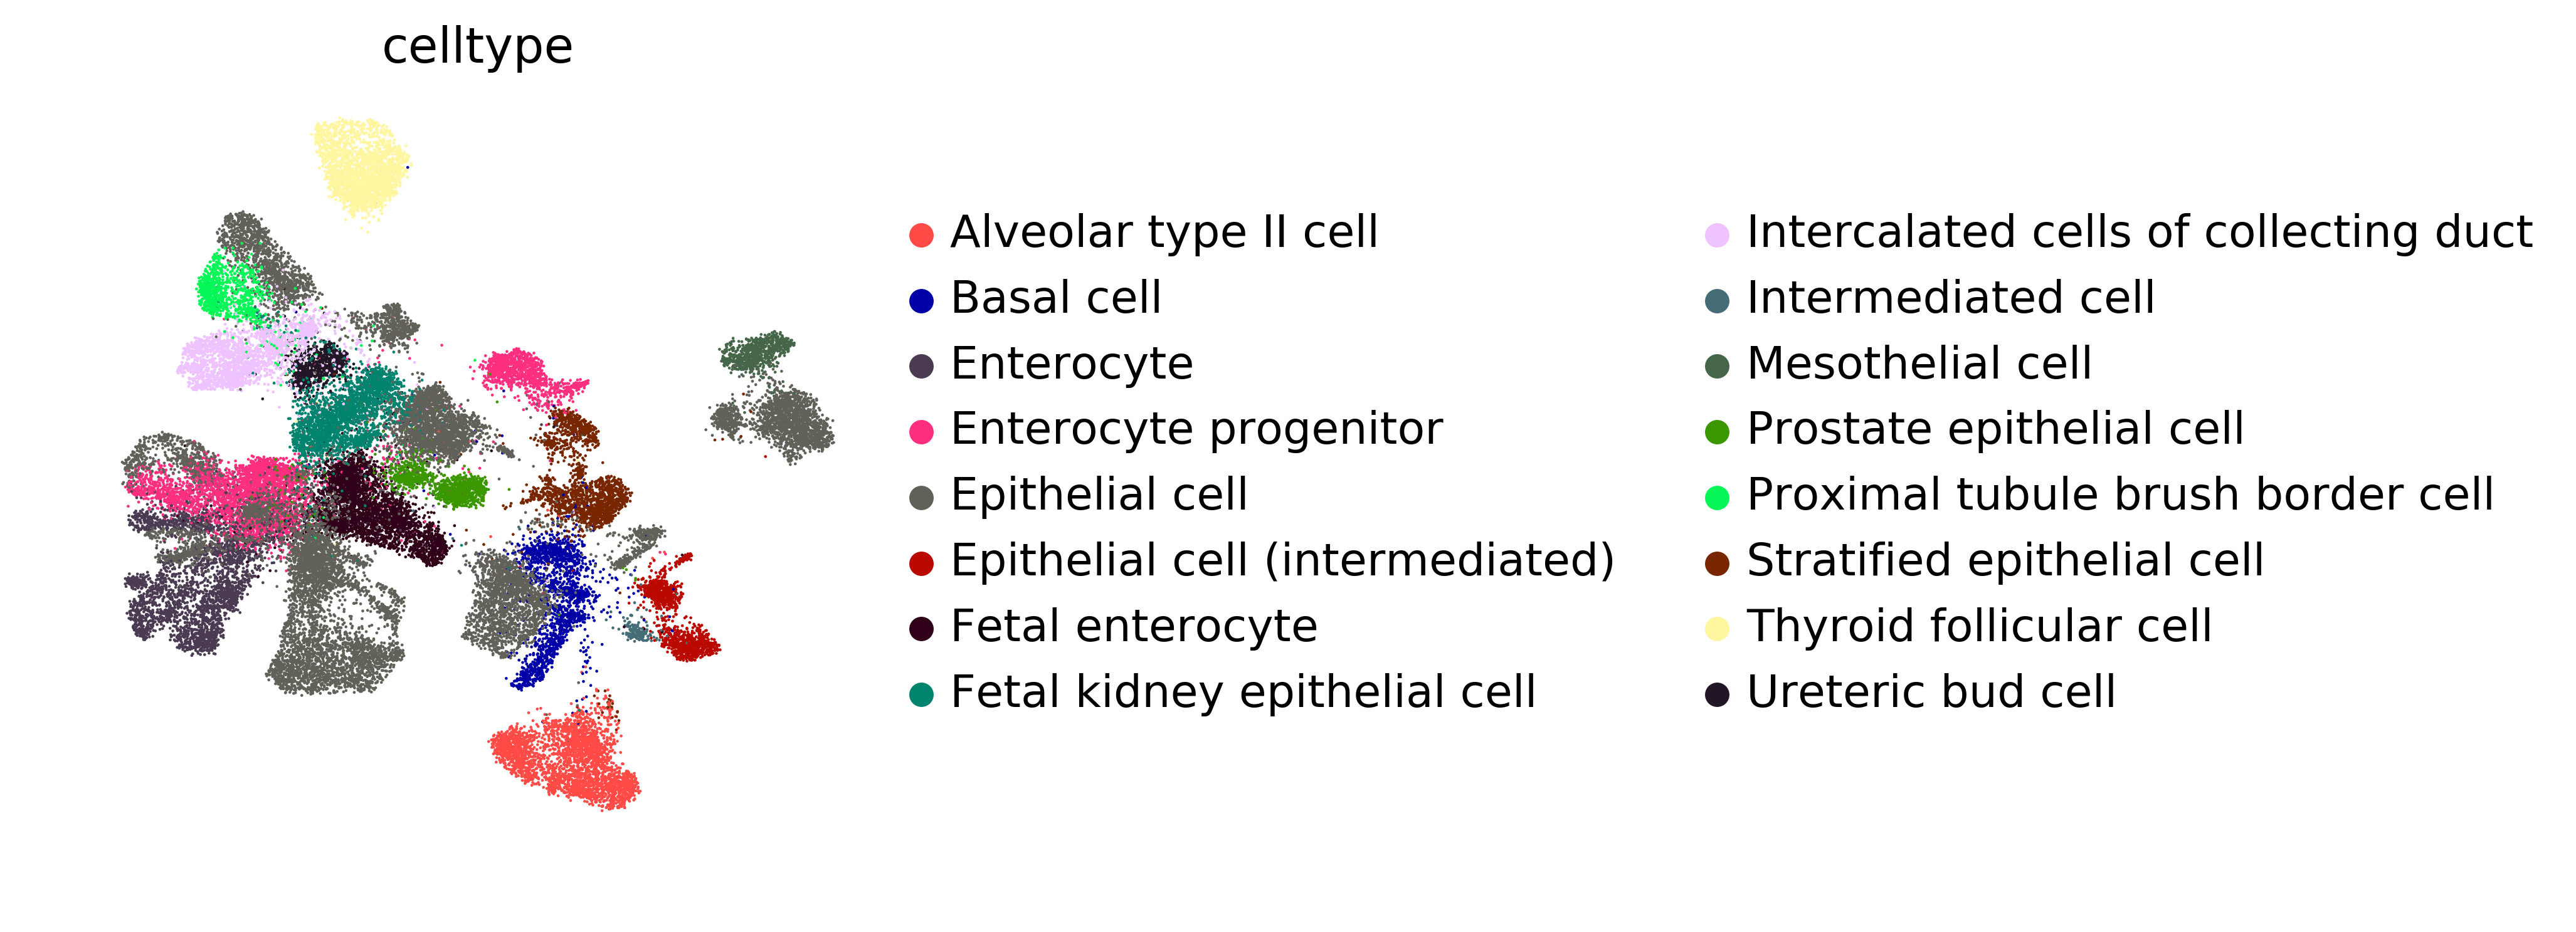

In [17]:
for i in cells_to_check:
    print(i)
    cluster = adata[adata.obs["celltype"].isin(clust_ct_map[i])]
    print(cluster)
    sc.pp.neighbors(cluster)
    sc.tl.umap(cluster)
    sc.pl.umap(cluster, color=["species"], save=f"_species_{i}.pdf", show=False, legend_loc=None)
    sc.pl.umap(cluster, color=["species"], save=None)
    sc.pl.umap(cluster, color=["stage"], save=f"_stage_{i}.pdf", show=False, legend_loc=None)
    sc.pl.umap(cluster, color=["stage"], save=None)
    sc.pl.umap(cluster, color=["celltype"], save=f"_celltype_{i}.pdf", show=False, legend_loc=None)
    sc.pl.umap(cluster, color=["celltype"], save=None)